# Object Orientated Programming
---

This notebook serves as an introduction to Object Oriented programming.

By the end of this you should:
- Know what a class is and how to create one
- Know how classes and objects relate to each other
- Know what inheritance is and how to implement it

In [2]:
import sys, os, math, random, functools

import numpy as np

import matplotlib
import matplotlib.pyplot as pp
import matplotlib.animation as anim

from IPython.display import display, HTML

class Pen(object):
    deg = math.pi/180.0
    
    def __init__(self,paper,colour='b'):
        # initialize state
        self.pos = (0,0)
        self.draw = True 
        self.angle = 0
        
        self.axes = paper.axes
        self.color = colour
        
    def forward(self,distance):
        # compute new position
        posnew = (self.pos[0] + distance*math.cos(self.deg * self.angle),
                  self.pos[1] + distance*math.sin(self.deg * self.angle))
        
        # draw line if pen is down
        if self.draw:
            line2d = pp.Line2D((self.pos[0],posnew[0]),(self.pos[1],posnew[1]),color=self.color)
            self.axes.add_line(line2d) # 1
        
        self.pos = posnew

    def back(self,distance):
        self.forward(-distance)            
            
    def left(self,angle):
        # change state
         self.angle = (self.angle + angle) % 360.0

    def right(self,angle):
        # change state
         self.angle = (self.angle - angle) % 360.0
            
    def penup(self):
        # change state
        self.draw = False
    
    def pendown(self):
        # change state
        self.draw = True
    
    def point(self,width=2):
        circle = pp.Circle(self.pos,width,color=self.color)
        self.axes.add_patch(circle)
        
class animaxes(object):
    def __init__(self,fig,axes,duration=1):
        self.fig = fig
        self.axes = axes
        
        # grant access to true matplotlib axes to allow Terrarium.rescale()
        self.axis = axes.axis
        
        self.duration = duration        
        self.objects = []
    
    def add_line(self,line):
        self.axes.add_line(line)
        self.objects.append(line)
        
    def add_patch(self,patch):
        self.axes.add_patch(patch)
        self.objects.append(patch)
        
    def animate(self,i):
        for obj in self.objects[i*self.dt:(i+1)*self.dt]:
            if isinstance(obj,matplotlib.lines.Line2D):
                self.axes.add_line(obj)
            else:
                self.axes.add_patch(obj)
    
    def animation(self):
        self.dt = max(1,int(len(self.objects) / (self.duration * 30)))
        n = math.ceil(len(self.objects) / self.dt)        
        rate = self.duration * 1000 / n
        
        self.axes.clear()
        self.axes.set_xticks([])
        self.axes.set_yticks([])
        for spine in ['bottom','top','left','right']:
            self.axes.spines[spine].set_color('0.9')
        
        return matplotlib.animation.FuncAnimation(self.fig,self.animate,blit=False,
                                                  frames=n,interval=rate,repeat=False)    
    
class Paper(object):    
    def __init__(self,figsize=5,animate=False,duration=2): # by default, a little larger
        self.fig = pp.figure(figsize=(figsize,figsize))
        self.axes = pp.axes()
        
        self.axes.set_xticks([])
        self.axes.set_yticks([])
        for spine in ['bottom','top','left','right']:
            self.axes.spines[spine].set_color('0.9')
        
        if animate:
            self.axes = animaxes(self.fig,self.axes,duration)

    def rescale(self):
        self.axes.axis('scaled')

        xmin, xmax, ymin, ymax = self.axes.axis()
        dx = (xmax - xmin) / 50
        self.axes.axis([xmin - dx,xmax + dx,ymin - dx,ymax + dx])
            
    def __enter__(self):
        return self
    
    def __exit__(self,*args):
        self.rescale()
        
        if isinstance(self.axes,animaxes):
            anim = self.axes.animation()
            display(HTML(anim.to_html5_video()))
            pp.close()

# https://www.linkedin.com/learning/python-programming-efficiently/divide-and-conquer-with-python-classes?u=2040068

### Objects
In the below cells we will be using an Object. The class will be created in the background but the below will just get you comfortable using the methods that are associated with an object. It might feel familiar to you since we use objects often without even realising. If you have ever used pandas DataFrames, you are actually working with an object (of the class DataFrame)

The object we will be working with is built off a simple concept: a pen. We have a pen that can move across a page and we need to tell it what to do using the methods: forward(), back(), left(), right(), penup(), pendown()

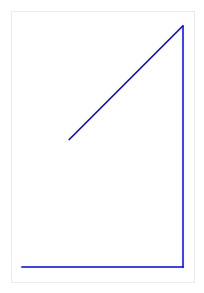

In [3]:
t = Paper() # Create a piece of paper (an object that allows us to draw in a space)

t1 = Pen(t) # Create a pen - default colour blue (an object that draws in the space passed to it)

# t1 = Pen(t, colour='r')  # would make a red pen

t1.forward(100) # The method in the Pen object that moves the pen forward 100 pixels
t1.left(90)     # Method that rotates pen 90 degrees left
t1.forward(150)
t1.right(45)
t1.back(100)    # Moves pen backwards, even though it is facing NE, it will draw SW

t.rescale()     # A method in Paper that rescales the paper to fit all the drawings

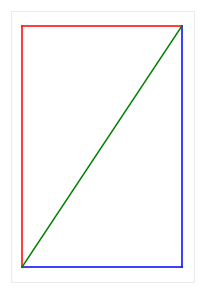

In [4]:

# YOUR CODE HERE
p = Paper()

pen1 = Pen(p, colour='r') # red pen
pen2 = Pen(p, colour='g') # green pen
pen3 = Pen(p, colour='b') # blue pen

pen1.left(90)
pen1.forward(150)
pen1.right(90)
pen1.forward(100)

pen3.forward(100)
pen3.left(90)
pen3.forward(150)

pen2.left(56.45)
pen2.forward(180.27)

p.rescale()

In [5]:
# A recursive function to draw a Koch
# This shows how creating something fairly complex can be made easy with objects
def drawkoch(pen,distance,level):
    
    if level == 0:
        # At the base of the recursion: draw a line
        pen.forward(distance)
        
    else:
        # Go one level down in the koch recursion and shorten the line 
        # (can be seen as creating a ratio of koch level to line length)
        drawkoch(pen,distance/3,level-1)
        
        # Rotate pen
        pen.left(60)
        
        # Repeat
        drawkoch(pen,distance/3,level-1)
        pen.left(-120)
        drawkoch(pen,distance/3,level-1)
        pen.left(60)
        drawkoch(pen,distance/3,level-1)

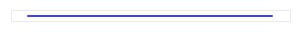

In [6]:
# Level 0, as expected, just a line
with Paper() as t:
    drawkoch(Pen(t),100,0)

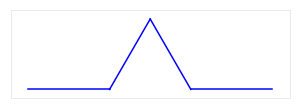

In [7]:
# Level 1, 4 lines, each is 3rd as long as the original line
with Paper() as t:
    drawkoch(Pen(t),100,1)

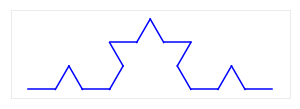

In [8]:
# Level 2, 16 lines, each is 9th as long as the original line
with Paper() as t:
    drawkoch(Pen(t),100,2)

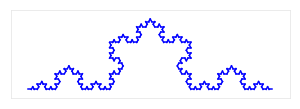

In [9]:
# Level 4, 256 lines, each is 81th as long as the original line
with Paper() as t:
    drawkoch(Pen(t),100,4)

In [10]:
# Creating a function that uses the drawkoch() function which then draws a snowflake
def snowflake(pen,dist,level):
    for i in range(3):
        drawkoch(pen,dist,level)
        pen.right(120)

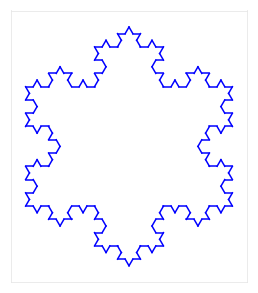

In [11]:
with Paper() as t:
    t1 = Pen(t)
    snowflake(t1,30,3)
    
    # change to "True" to see the 3 fractals in the snowflake
    if False:                   
        t2 = Pen(t, colour='r')
        t2.forward(30)
        t2.right(120)
        t2.forward(30)
        t2.right(120)
        t2.forward(30)

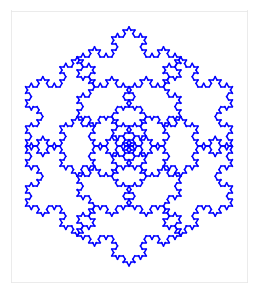

In [12]:
# Create multiple snowflakes to make some magic
with Paper() as t:
    t1 = Pen(t)
    
    def flake():
        snowflake(t1,30,3)
        
    def left():
        t1.left(60)
    
    for f in [flake,left] * 6:
        f()

#### Recap
Objects have methods associated with them that allow them to manipulate and return the data stored within the object. Each object will have the same types of data but each can be different (like the different coloured pens). Once an object has been created, it is easy to use and even wrap in functions to get more out of them. 
If object are still a little foreign to you, we will now see how they are created (not just called) using **Classes** and how to set up the data and methods associated with an object.

### Objects and Classes

An object is an instance of a class that the developer creates. It is a container of all inforamtion and methods that relates to the instance. For example: a cocktail recipe can be a **class**, it has liquors associated with it, and a method `get_recipe`. Every time someone buys a cocktail, either a barman or robot can access the recipe for that cocktail and make it.

This might not make that much sense so lets program a Cocktail class.
HINT: When an object is created then `__init__(self)` function is automatically called, and then object is passed to itself in the form of `self`. To then access the variables of a class, `self.<your variable>` needs to be called. For example, in the Pen class it looks like this: 
```python
class Pen:
    def __init__(self,colour='b'):
        self.col = colour
```
Some of the code has been removed for simplicity but this shows the essentials of member variable assertion. When an instance of `Pen` is created, the object gets passed to itself with the variable `colour = 'b' ` (which assigns a default value and can be overwritten). `self.col` is created and the value 'b' then gets stored there.

With that in mind, attempt at completing the exercise below.

In [14]:
class Cocktail:
    def __init__(self, vodka=0, gin=0, tequila=0, whiskey=0, rum=0):
        # This will run as soon as an object is created from this class
        self.vodka = vodka
        self.gin = gin
        self.tequila = tequila
        self.whiskey = whiskey
        self.rum = rum
    def get_recipe(self):
        # This function will be called when the human/robot wants to know the recipe
        recipe = {
            'vodka (ml)' : self.vodka,
            'gin (ml)' : self.gin,
            'tequila (ml)' : self.tequila,
            'whiskey (ml)' : self.whiskey,
            'rum (ml)' : self.rum,
        }
        return recipe

In [15]:
empty_glass = Cocktail()
print(empty_glass.get_recipe())

{'vodka (ml)': 0, 'gin (ml)': 0, 'tequila (ml)': 0, 'whiskey (ml)': 0, 'rum (ml)': 0}


In [16]:
mojito = Cocktail(rum=44)

In [17]:
print(mojito.get_recipe())

{'vodka (ml)': 0, 'gin (ml)': 0, 'tequila (ml)': 0, 'whiskey (ml)': 0, 'rum (ml)': 44}


In [18]:
good_time = Cocktail(vodka=10, gin=0, tequila=40, whiskey=25, rum=25)
print(good_time.get_recipe())

{'vodka (ml)': 10, 'gin (ml)': 0, 'tequila (ml)': 40, 'whiskey (ml)': 25, 'rum (ml)': 25}


### Inheritance
Inheritance is the idea of reusing a class's code and structure inside another object. Essentially to re-use code (good programming practice: waste not) and to show strong relationships between classes. This example uses the `Pen` class.

Since code has been written to draw straight lines, it would be a shame to re-write a whole bunch of new code to draw messy lines. It would make much more sense to re-use the already written code, and just add some noise to the line as it is drawn. This can easily be done with inheritance like so:

In [19]:
class MessyPen(Pen):
    
    def forward(self,distance):
        self.right(random.uniform(-10,10))
        super().forward(random.uniform(0.75,1.25)*distance)

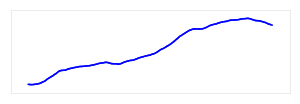

In [22]:
with Paper() as t:
    t1 = MessyPen(t)
    
    for i in range(200):
        t1.forward(1)

Ok, so lets unpack this:
We define a new classe "MessyPen". When we create it, we pass the "Pen" class, this is what tells python we are using inheritance. This means that everything in the Pen class gets re-defined in the `MessyPen` class. We don't define another `__init__` since it will be the same as the Pen class. We can change colour, direction and move backwards as if we were using the `Pen` class (see below). However, we have overwritten the forward() method (NOTE: we call the `Pen` `forward()` method by using the `super()` function) so whenever forward is called on a `MessyPen` object, it will use this new `forward()` method. Essentially all this method is doing is adding random noise to rotation and distance traveled by the pen.

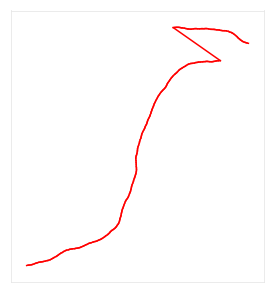

In [24]:
with Paper() as t:
    t1 = MessyPen(t, colour='r')
    
    t1.left(20)
    for i in range(200):
        t1.forward(1)
    t1.right(45)
    t1.back(40)
    t1.left(45)
    for i in range(50):
        t1.forward(1)

#### Recap

Inheritence actually inherits all of the "parent" class's code. If no code is written inside the "child" class, they will be identical. However, slight mutations are introduced to add new/alter functionality of the parent class. This support the good coding practice of re-use and it makes for better interoperability (which lends to maintainability of code)